## Example 1: Predicting Bikes Traffic using linear regression

There are two raw data in this example.

"fremont_hourly.csv": the hourly number of bikes passing the fremont bridge in Seattle

"2346240.csv": the daily weather forecast in Seattle

Our aims is to use the data in "2346240.csv" to predict the daily number of bikes that pass the fremont bridge in Seattle using linear regression

We need to make our dataset(feature extraction, feature selection ,etc) first(step 1 to step 9) and then use a linear regression model for training(step 10 to the end)

In [1]:
# step 1, load the data set and output the first two rows
import os
import pandas as pd
#Load in the data sets 'fremont_hourly.csv' as counts and '2346240.csv' as weather
#For counts, use 'Date' as the rownames
#For weather, use 'DATE' as the rownames
#Use parse_dates=True to try parsing the index as datetime type
counts = pd.read_csv('fremont_hourly.csv',index_col='Date',parse_dates=True)
weather = pd.read_csv('2346240.csv',index_col='DATE',parse_dates=True)

In [2]:
weather.head(2)

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
counts.head(2)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0


In [ ]:
# step 2, since the records in 'fremont_hourly.csv' are in 1-hour interval
# we need to summarize them into daily traffic counts
# and create a new dataframe "daily" with column 'Fremont Bridge Total' and print the first five rows

# Hint: resample('d').sum() method to summarize the daily bicycle traffic



In [ ]:
# step 3, create the one-hot encoding for day-of-week in the daily
# since in linear regression, we use the one-hot encoding to denote the multi-category variables (day-of-week in this context).
# print first five rows of the daily



In [ ]:
# step 4, create a vector for denoting holidays
# expected output: a new column 'holiday' with 1 as holiday and 0 as non-holiday

# Hint: use function USFederalHolidayCalendar() to get the holidays


# print the first five elements of the holidays


# convert holidays to binary coding, and add a new column "hoilday" in "daily"



In [ ]:
# step 5, using the given function to creare a column 'daylight_hrs' to compute the hours of daylight in "daily"
# Sunrise equation for one specific date
import numpy as np
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
          * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.



In [ ]:
# step 6, plot the hours of daylight of the dataset


In [ ]:
# step 7, print the first five rows of daily to check what features we got from "fremont_hourly.csv"


In [ ]:
# step 8, Use the information from 'weather' dataframe to create temperature, dry day and precipitation(PRCP)
# step 8-1,check the shape and the timeindex of `weather` and `daily` dataframes to see if they are aligned


In [ ]:
# step 8-2, choose the columns 'Temp (C)' to compute the average temperature


In [ ]:
# step 8-2, create the 'dry day' column, according to the column "PRCP". (If there was no precipitation,then it was a dry day.)


In [ ]:
# step 8-3, adding three new column 'Temp (C)','dry day','PRCP' and 'PRCP' in the weather dataframe to the "daily" dataframe


In [ ]:
# step 9, create a column that measures how many years have passed
# Expected output: a new column 'annual' storing the values of pasting years (float-type)


### Model fitting and predicting
Use linear regression to predict the daily bicycle traffic. Compare the predicted daily bicycle traffic and the true data by ploting them on the same graph. Print the coefficients of the fitted model.

In [ ]:
# step 10, get the training data and the label, then use linear regression to predict the daily bicycle traffic
# Hint LinearRegression from the sklearn package
from sklearn.linear_model import LinearRegression

# split the training data and the label

# train a linear regression model


In [ ]:
# step 11, print the prediction


In [ ]:
# step 12, plot the prediction and the real data to see the difference


In [ ]:
# step 13, print the parameters


---
## Example 2: Face Recognition

Aims: Use PCA to extract features, and adjust parameters in the SVM and determine the best model.

### Load in the dataset

In [ ]:
# load the data and print
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)#The extracted dataset will only retain pictures of people that have at least min_faces_per_person different pictures.
print(faces.target_names)
print(faces.images.shape)

In [ ]:
# visualization of the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5,figsize=(20,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='pink')
    axi.set(xticks=[], yticks=[],
        xlabel=faces.target_names[faces.target[i]])

### Model preparation
Hint: 
- For PCA: keep 150 components; use `whiten=True` to keep the outputs with unit component-wise variances
- For SVM: use `'rbf'` kernel and set `class_weight='balanced'`
- Make a pipeline

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


### Data set preparation
Hint: split the data into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split


### Parameter tuning and find the best model
Hint: adjust  C (which controls the margin hardness) and  gamma (whichcontrols the size of the radial basis function kernel); use the best model to predict the labels for the test data.

In [ ]:
from  sklearn.model_selection import GridSearchCV
import time


### Visualize the result

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
# print the index
from sklearn.metrics import classification_report


### Draw the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 


## Example 3: Random Forest for Classifying Digits

Aims: use random forest to classify the digital numbers

In [4]:
# step 1, load the data set
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

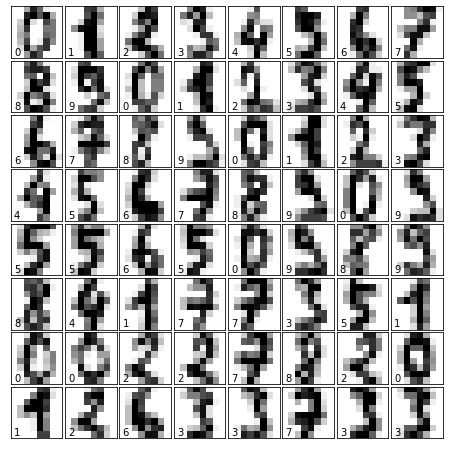

In [5]:
# step 2, visiualization of data 
import matplotlib.pyplot as plt 
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
# step 3, using train_test_split() to split the original data into traning and testing set
from sklearn.ensemble import RandomForestClassifier
import sklearn


In [ ]:
# step 4: using 1000 trees to build the forest and print the prediction


In [ ]:
# step 5, using metrics.classification_report() to compute and print the precision, recall, F1-score, and the support of the model
from sklearn import metrics


In [ ]:
# step 6, using confusion_matrix() to draw the confusion_matrix of the results
from sklearn.metrics import confusion_matrix
import seaborn as sns 


---
## Example 4: K-means for color compression

Aims: apply K-means algorithm to compress the color of image

Basic knowledge for image coloring:

Images are usually stored in the so-called three channel "RGB" format (Red, Green, Blue) with values from 0 to 255 to depict the greyscale. Therefore, there could be $256^3\approx 16$ million types of colors. What we want to do is to reduce the 16 million colors to just 16 colors using k-means clustering.

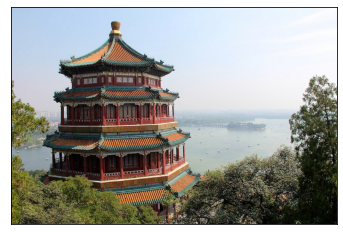

In [6]:
# step 1, load the image and show it
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [ ]:
# step 2, print the shape of the image


In [ ]:
# step 3, image preprocessing: rescale the pixel value to [0,1]


In [ ]:
# step 4, image preprocessing: reshape the data into a 2d array and keep the last dimension to 3, and print the shape


In [ ]:
# step 5, Use the mini-batch k-means, 'MiniBatchKMeans()'' to reduce the number of colors into 16
from sklearn.cluster import MiniBatchKMeans


In [ ]:
# step 6, Reshape the new image back to 3d array and named it as china_recolored and print the shape


In [ ]:
# step 7, Plotting the original images and the compressed image
